In [64]:
import  matplotlib.pyplot as plt

In [65]:
import os

In [66]:
path = 'C:\\Users\\anlazar\\Full_Archive\\New Files\\olist db\\'

In [70]:
for file in os.listdir(path):
    if file.startswith('olist') and file.endswith('.csv') and 'leads' not in file and 'filtered' not in file:
        print(file.replace('olist_', '')
                  .replace('.csv', '')
                  .replace('_dataset', '') + '_df')

customers_df
geolocation_df
orders_df
order_items_df
order_payments_df
order_reviews_df
products_df
product_category_name_translation_df
sellers_df


In [73]:
for file in os.listdir(path):
    if file.startswith('olist') and file.endswith('.csv') and 'leads' not in file and 'filtered' not in file:
        globals()[file.replace('olist_', '').replace('.csv', '').replace('_dataset', '') + '_df'] = pd.read_csv(path+file)

In [74]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,1,1,shipped,9/4/2016 21:15,10/7/2016 13:18,10/18/2016 13:14,NaN,10/20/2016 0:00
1,2,2,canceled,9/5/2016 0:15,10/7/2016 13:17,NaN,NaN,10/28/2016 0:00
2,3,3,canceled,9/13/2016 15:24,10/7/2016 13:16,NaN,NaN,9/30/2016 0:00
3,4,4,delivered,9/15/2016 12:16,9/15/2016 12:16,11/7/2016 17:11,11/9/2016 7:47,10/4/2016 0:00
4,5,5,canceled,10/2/2016 22:07,10/6/2016 15:50,NaN,NaN,10/25/2016 0:00
...,...,...,...,...,...,...,...,...
99436,99437,99437,canceled,9/29/2018 9:13,NaN,NaN,NaN,10/15/2018 0:00
99437,99438,99438,canceled,10/1/2018 15:30,NaN,NaN,NaN,10/23/2018 0:00
99438,99439,99439,canceled,10/3/2018 18:55,NaN,NaN,NaN,10/16/2018 0:00
99439,99440,99440,canceled,10/16/2018 20:16,NaN,NaN,NaN,11/12/2018 0:00


In [76]:
orders_df.columns.values[3:]

array(['order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'], dtype=object)

In [77]:
for column in orders_df.columns.values[3:]:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [78]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  int64         
 1   customer_id                    99441 non-null  int64         
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2), object(1)
memory usage: 6.1+ MB


In [81]:
import numpy as np
np.iinfo('uint32')

iinfo(min=0, max=4294967295, dtype=uint32)

In [82]:
for column in orders_df.columns.values[:2]:
    orders_df[column] = orders_df[column].astype('uint32')

In [84]:
orders_df['order_status'] = orders_df['order_status'].astype('category')

In [85]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  uint32        
 1   customer_id                    99441 non-null  uint32        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), uint32(2)
memory usage: 4.6 MB


### Line Chart

In [91]:
#analiza tendinta nr comenzi, la nivel de luna
orders_per_month_df = (
orders_df
    .set_index(keys = 'order_purchase_timestamp')
    .resample(rule = 'M') #resample to month level
    .count()
    [['order_id']]
    .rename(columns = {'order_id':'no_orders'})
)

In [92]:
orders_per_month_df

,no_orders
order_purchase_timestamp,
2016-09-30,4
2016-10-31,324
2016-11-30,0
2016-12-31,1
2017-01-31,800
2017-02-28,1780
2017-03-31,2682
2017-04-30,2404
2017-05-31,3700


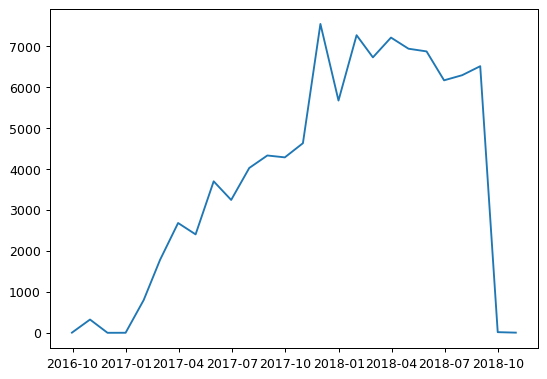

In [97]:
plt.figure(figsize = (7, 5), dpi = 90)
plt.plot(orders_per_month_df.index, orders_per_month_df['no_orders'])
plt.show()

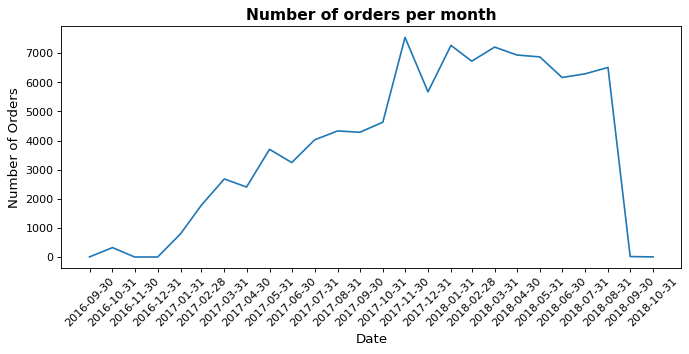

In [111]:
plt.figure(figsize = (10, 4), dpi = 80)
plt.plot(orders_per_month_df.index, orders_per_month_df['no_orders'])
plt.title('Number of orders per month', fontdict = {'fontsize':14, 'fontweight':1000})
plt.xlabel('Date', fontdict = {'fontsize':12})
plt.ylabel('Number of Orders', fontdict = {'fontsize':12})
plt.xticks(orders_per_month_df.index, orders_per_month_df.index.date, rotation = 45)
plt.show()

### Bar Chart

In [112]:
#numar de clienti per stat + stat cu cel mai mare nr clienti
customers_df['customer_state'].value_counts()

SP    41740
RJ    12852
MG    11634
RS     5466
PR     5044
SC     3635
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

In [123]:
customers_by_state_df = (
customers_df
    .groupby(by = 'customer_state')
    .nunique()
    [['customer_unique_id']]
    .rename(columns = {'customer_unique_id':'no_customers'})
    .sort_values(by = 'no_customers', ascending = False)
)

In [117]:
customers_by_state_df

,no_customers
customer_state,
AC,77
AL,401
AM,143
AP,67
BA,3277
CE,1313
DF,2075
ES,1964
GO,1952


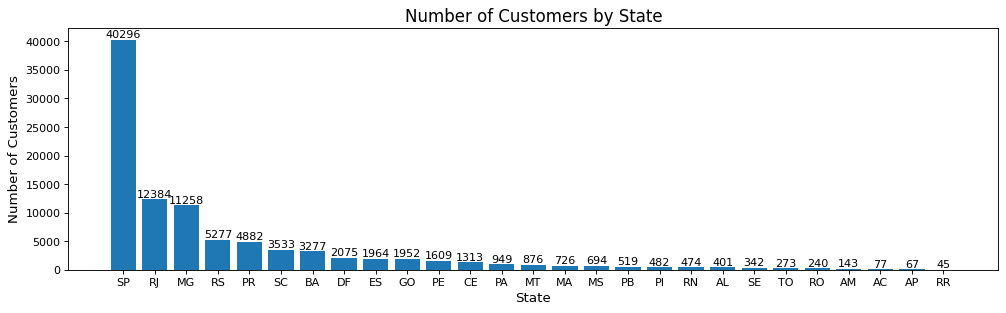

In [124]:
plt.figure(figsize = (15, 4), dpi = 80)
bars_container = plt.bar(x = customers_by_state_df.index, height = customers_by_state_df['no_customers'])
plt.title('Number of Customers by State', fontdict = {'fontsize':15})
plt.xlabel('State', fontdict = {'fontsize':12})
plt.ylabel('Number of Customers', fontdict = {'fontsize':12})
plt.bar_label(bars_container)
plt.show()

In [150]:
#horizontal bar chart
top10_states_df = (
    customers_by_state_df
    .iloc[:10]
    .sort_values(by = 'no_customers')
)

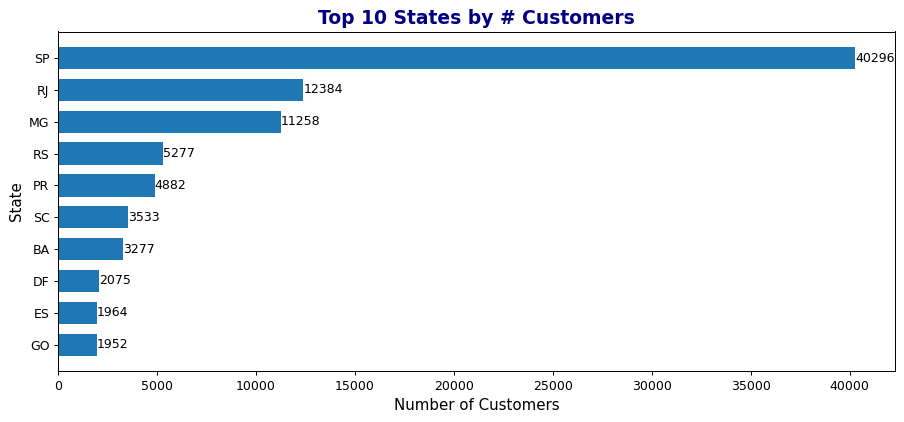

In [151]:
plt.figure(figsize = (12, 5), dpi = 90)
bars_container = plt.barh(y = top10_states_df.index, width = top10_states_df['no_customers'], height = 0.7)
plt.title('Top 10 States by # Customers', fontdict = {'fontsize':15, 'fontweight':1000, 'color':'navy'})
plt.xlabel('Number of Customers', fontdict = {'fontsize':12})
plt.ylabel('State', fontdict = {'fontsize':12})
plt.bar_label(bars_container)
plt.show()

In [152]:
top10_states_df

,no_customers
customer_state,
GO,1952
ES,1964
DF,2075
BA,3277
SC,3533
PR,4882
RS,5277
MG,11258
RJ,12384


### Pie Chart

In [153]:
top10_states_df['no_customers'].sum()

86898

In [154]:
top10_states_df['proportions'] = round(100 * top10_states_df['no_customers']/top10_states_df['no_customers'].sum(), 2)
top10_states_df

,no_customers,proportions
customer_state,,
GO,1952,2.25
ES,1964,2.26
DF,2075,2.39
BA,3277,3.77
SC,3533,4.07
PR,4882,5.62
RS,5277,6.07
MG,11258,12.96
RJ,12384,14.25


In [155]:
40296/86898

0.4637160809224608

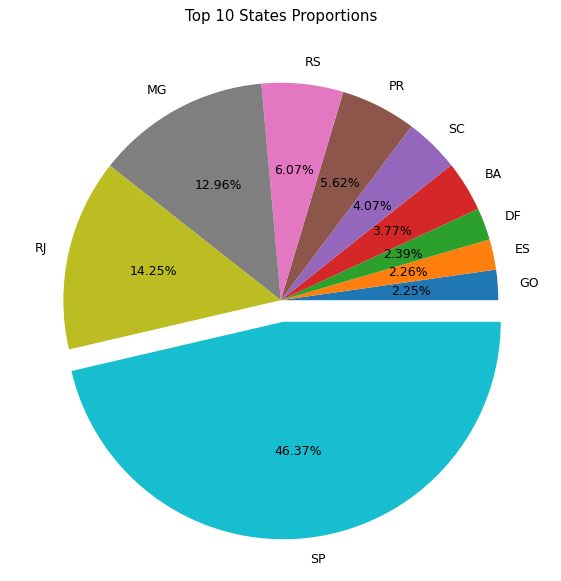

In [163]:
plt.figure(figsize = (9,8), dpi=90)
plt.pie(x = top10_states_df['proportions'], labels = top10_states_df.index, autopct = '%1.2f%%', explode = [0.0]*(len(top10_states_df)-1)+[0.1])
plt.title('Top 10 States Proportions')
plt.show()

In [165]:
#analiza comparativa a tendintei nr de clienti per zi pt statele RJ, SP
customers_orders_SP_df = (
    orders_df[['customer_id', 'order_purchase_timestamp']]
        .merge(right = customers_df[customers_df['customer_state'] == 'SP'][['customer_id', 'customer_unique_id']])
        .set_index(keys = 'order_purchase_timestamp')
        .resample(rule = 'D')
        .nunique()
        [['customer_unique_id']]
        .rename(columns = {'customer_unique_id':'no_customers'})
)
    
customers_orders_RJ_df = (
    orders_df[['customer_id', 'order_purchase_timestamp']]
        .merge(right = customers_df[customers_df['customer_state'] == 'RJ'][['customer_id', 'customer_unique_id']])
        .set_index(keys = 'order_purchase_timestamp')
        .resample(rule = 'D')
        .nunique()
        [['customer_unique_id']]
        .rename(columns = {'customer_unique_id':'no_customers'})
)

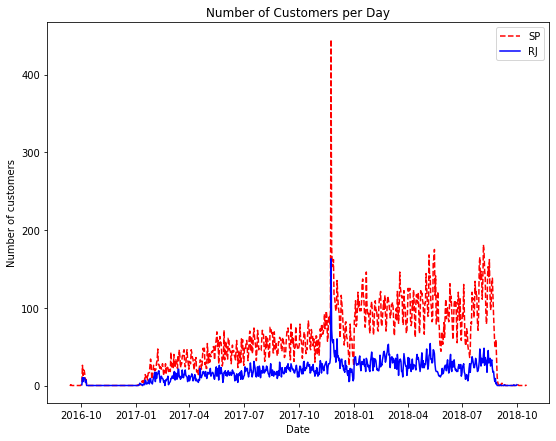

In [181]:
(fig, ax) = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(9,7)
(plot1, ) = ax.plot(customers_orders_SP_df.index, customers_orders_SP_df['no_customers'], color = 'r', linestyle = '--')
(plot2, ) = ax.plot(customers_orders_RJ_df.index, customers_orders_RJ_df['no_customers'], color = 'b')
ax.set_xlabel('Date')
ax.set_ylabel('Number of customers')
ax.set_title('Number of Customers per Day')
ax.legend(handles = (plot1, plot2), labels = ('SP', 'RJ'))
plt.show()

In [182]:
import pymannkendall as mk

ModuleNotFoundError: No module named 'pymannkendall'

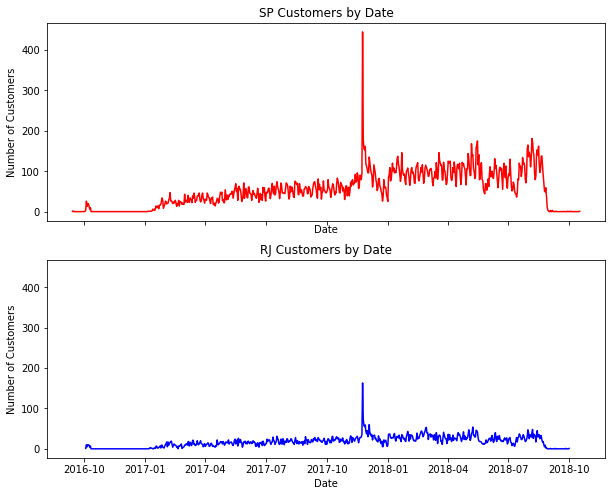

In [189]:
(fig, ax) = plt.subplots(nrows = 2, ncols = 1, sharey = True, sharex = True)
fig.set_size_inches(10, 8)
ax[0].plot(customers_orders_SP_df.index, customers_orders_SP_df['no_customers'], color = 'r')
ax[1].plot(customers_orders_RJ_df.index, customers_orders_RJ_df['no_customers'], color = 'b')
ax[0].set_title('SP Customers by Date')
ax[1].set_title('RJ Customers by Date')
ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')
ax[0].set_ylabel('Number of Customers')
ax[1].set_ylabel('Number of Customers')
plt.show()

### Pareto Chart

In [199]:
#top 10 categorii de produse
sales_by_category_df = (
products_df[['product_id', 'product_category_name']]
    .merge(right = product_category_name_translation_df)
    .merge(right = order_items_df[['product_id', 'price']])
    .groupby(by = 'product_category_name_english', as_index = False)
    .sum()
    [['product_category_name_english', 'price']]
    .rename(columns = {'price':'sales', 'product_category_name_english':'category'})
    .nlargest(n=10,columns = 'sales')
    .set_index('category')
)
sales_by_category_df

,sales
category,
health_beauty,1258681.34
watches_gifts,1205005.68
bed_bath_table,1036988.68
sports_leisure,988048.97
computers_accessories,911954.32
furniture_decor,729762.49
cool_stuff,635290.85
housewares,632248.66
auto,592720.11


In [202]:
sales_by_category_df['cumperc'] = round(100*sales_by_category_df['sales'].cumsum()/sales_by_category_df['sales'].sum(), 2)
sales_by_category_df

,sales,cumperc
category,,
health_beauty,1258681.34,14.85
watches_gifts,1205005.68,29.07
bed_bath_table,1036988.68,41.30
sports_leisure,988048.97,52.96
computers_accessories,911954.32,63.72
furniture_decor,729762.49,72.33
cool_stuff,635290.85,79.82
housewares,632248.66,87.28
auto,592720.11,94.27


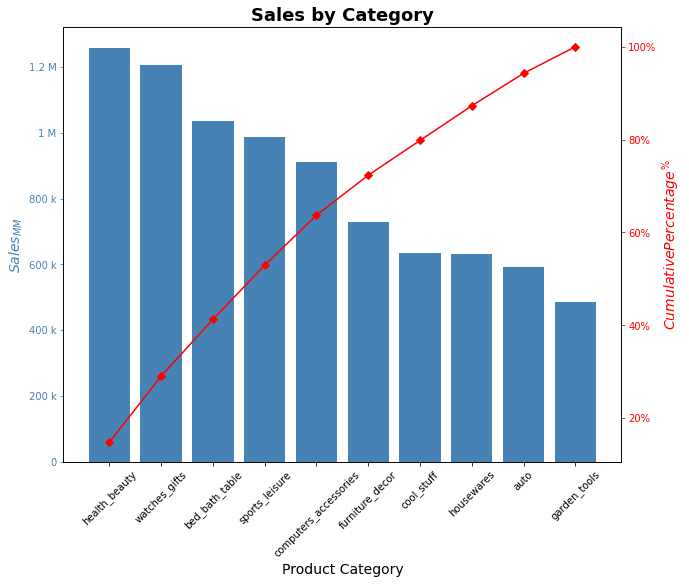

In [232]:
(fig, ax) = plt.subplots()
fig.set_size_inches(10, 8)
ax.bar(sales_by_category_df.index, sales_by_category_df['sales'], color = 'steelblue')
ax.set_xticks(ticks = sales_by_category_df.index)
ax.set_xticklabels(labels = sales_by_category_df.index, rotation = 45)
ax.set_xlabel('Product Category', fontdict = {'fontsize':14})
ax.set_ylabel('$Sales_{MM}$', fontdict = {'fontsize':14, 'color':'steelblue'})
ax.set_title('Sales by Category', fontdict = {'fontsize':18, 'fontweight':1000})
#ax.set_ytickslabels(f'{sales_by_category_df['sales']}*10^6')

ax2 = ax.twinx()
ax2.plot(sales_by_category_df.index, sales_by_category_df['cumperc'], color = 'red', marker = 'D', ms = 6)

from matplotlib.ticker import PercentFormatter, EngFormatter, FuncFormatter
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.yaxis.set_major_formatter(EngFormatter())

ax.tick_params(axis = 'y', colors = 'steelblue')
ax2.tick_params(axis = 'y', colors = 'red')
ax2.set_ylabel('$Cumulative Percentage^{\%}$', fontdict = {'fontsize':14, 'color':'red'})

plt.show()

## Statistica descriptiva

In [233]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  uint32        
 1   customer_id                    99441 non-null  uint32        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), uint32(2)
memory usage: 4.6 MB


In [235]:
orders_df['delivery_days'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days
orders_df['delivery_days']

0         NaN
1         NaN
2         NaN
3        54.0
4         NaN
         ... 
99436     NaN
99437     NaN
99438     NaN
99439     NaN
99440     NaN
Name: delivery_days, Length: 99441, dtype: float64

In [236]:
orders_df['delivery_days'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days
orders_df['estimated_delivery_days'] = (orders_df['order_estimated_delivery_date'] - orders_df['order_purchase_timestamp']).dt.days
orders_df['days_btw_purch_and_approval'] = (orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']).dt.days
orders_df['days_btw_approval_and_carrier'] = (orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']).dt.days
orders_df['days_btw_carrier_and_customer'] = (orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']).dt.days

In [241]:
orders_df.iloc[:, [2, 8, 9, 10, 11, 12]]

,order_status,delivery_days,estimated_delivery_days,days_btw_purch_and_approval,days_btw_approval_and_carrier,days_btw_carrier_and_customer
0,shipped,NaN,45,32.0,10.0,NaN
1,canceled,NaN,52,32.0,NaN,NaN
2,canceled,NaN,16,23.0,NaN,NaN
3,delivered,54.0,18,0.0,53.0,1.0
4,canceled,NaN,22,3.0,NaN,NaN
...,...,...,...,...,...,...
99436,canceled,NaN,15,NaN,NaN,NaN
99437,canceled,NaN,21,NaN,NaN,NaN
99438,canceled,NaN,12,NaN,NaN,NaN
99439,canceled,NaN,26,NaN,NaN,NaN


### Masuri de tendinta centrala: medie, mediana, mod

In [245]:
(orders_df
     .iloc[:,-5:]
     .mean()
     .to_frame()
     .rename(columns = {0:'mean_val'})
)

,mean_val
delivery_days,12.094511
estimated_delivery_days,23.404350
days_btw_purch_and_approval,0.270555
days_btw_approval_and_carrier,2.302159
days_btw_carrier_and_customer,8.878953


In [ ]:
orders_df.mean()

In [248]:
(
orders_df
    .iloc[:,-5:]
    .median()
    .to_frame()
    .rename(columns = {0:'median_val'})
)

,median_val
delivery_days,10.0
estimated_delivery_days,23.0
days_btw_purch_and_approval,0.0
days_btw_approval_and_carrier,1.0
days_btw_carrier_and_customer,7.0


In [255]:
(
orders_df
    .iloc[:, -5:]
    .mode()
    .stack()
    .to_frame()
    .droplevel(0)
    .rename(columns = {0:'mode_val'})
)

,mode_val
delivery_days,7.0
estimated_delivery_days,21.0
days_btw_purch_and_approval,0.0
days_btw_approval_and_carrier,0.0
days_btw_carrier_and_customer,6.0


### Masuri de dispersie: gama, gama inter-cvartilica, varianta, deviatie standard

In [258]:
(
orders_df
    .iloc[:,-5:]
    .max()
    .sub(
         orders_df
            .iloc[:,-5:]
            .min()
            )
    .to_frame()
    .rename(columns = {0:'range_val'})
)

,range_val
delivery_days,209.0
estimated_delivery_days,154.0
days_btw_purch_and_approval,187.0
days_btw_approval_and_carrier,297.0
days_btw_carrier_and_customer,222.0


In [260]:
(
orders_df
    .iloc[:,-5:]
    .max()
)

delivery_days                    209.0
estimated_delivery_days          155.0
days_btw_purch_and_approval      187.0
days_btw_approval_and_carrier    125.0
days_btw_carrier_and_customer    205.0
dtype: float64

In [261]:
(
orders_df
    .iloc[:,-5:]
    .min()
)

delivery_days                      0.0
estimated_delivery_days            1.0
days_btw_purch_and_approval        0.0
days_btw_approval_and_carrier   -172.0
days_btw_carrier_and_customer    -17.0
dtype: float64

In [263]:
(orders_df
[(orders_df['days_btw_approval_and_carrier'] <0) | (orders_df['days_btw_carrier_and_customer'] < 0)]
[['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 
  'days_btw_approval_and_carrier', 'days_btw_carrier_and_customer']]
)

,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,days_btw_approval_and_carrier,days_btw_carrier_and_customer
181,delivered,2016-10-07 11:24:00,2016-10-26 11:43:00,2016-10-20 18:03:00,19.0,-6.0
185,delivered,2016-10-11 04:56:00,2016-10-21 18:02:00,2016-10-20 20:33:00,10.0,-1.0
205,delivered,2016-10-07 17:32:00,2016-10-26 11:42:00,2016-10-20 19:07:00,18.0,-6.0
241,delivered,2016-10-08 18:13:00,2016-10-26 11:41:00,2016-10-25 17:51:00,17.0,-1.0
914,delivered,2017-01-27 15:30:00,2017-02-20 02:32:00,2017-02-15 03:53:00,23.0,-5.0
...,...,...,...,...,...,...
98995,delivered,2018-08-23 16:10:00,2018-08-23 15:31:00,2018-08-27 18:54:00,-1.0,4.0
99089,delivered,2018-08-24 13:24:00,2018-08-24 12:00:00,2018-08-30 19:11:00,-1.0,6.0
99096,delivered,2018-08-24 14:24:00,2018-08-24 13:46:00,2018-08-30 20:32:00,-1.0,6.0
99102,delivered,2018-08-24 14:50:00,2018-08-24 12:43:00,2018-08-30 20:47:00,-1.0,6.0


In [270]:
pd.options.display.min_rows = 50

In [271]:
(orders_df
[orders_df['days_btw_approval_and_carrier'] <0]
[['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'days_btw_approval_and_carrier']]
)

,order_status,order_approved_at,order_delivered_carrier_date,days_btw_approval_and_carrier
2392,delivered,2017-03-01 10:51:00,2017-02-22 16:05:00,-7.0
7335,delivered,2017-04-27 10:32:00,2017-04-26 18:47:00,-1.0
7426,delivered,2017-04-27 10:33:00,2017-04-27 07:42:00,-1.0
7441,delivered,2017-04-27 10:32:00,2017-04-26 09:11:00,-2.0
7459,delivered,2017-04-27 10:32:00,2017-04-27 07:18:00,-1.0
7461,delivered,2017-04-27 10:32:00,2017-04-26 09:16:00,-2.0
7542,delivered,2017-04-27 13:33:00,2017-04-27 07:18:00,-1.0
7543,delivered,2017-04-27 13:33:00,2017-04-26 21:33:00,-1.0
7546,delivered,2017-04-27 13:32:00,2017-04-27 08:04:00,-1.0
7548,delivered,2017-04-27 13:36:00,2017-04-26 09:47:00,-2.0


In [272]:
(orders_df
[orders_df['days_btw_carrier_and_customer'] < 0]
[['order_status', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'days_btw_carrier_and_customer']]
)

,order_status,order_delivered_carrier_date,order_delivered_customer_date,days_btw_carrier_and_customer
181,delivered,2016-10-26 11:43:00,2016-10-20 18:03:00,-6.0
185,delivered,2016-10-21 18:02:00,2016-10-20 20:33:00,-1.0
205,delivered,2016-10-26 11:42:00,2016-10-20 19:07:00,-6.0
241,delivered,2016-10-26 11:41:00,2016-10-25 17:51:00,-1.0
914,delivered,2017-02-20 02:32:00,2017-02-15 03:53:00,-5.0
1374,delivered,2017-02-15 08:55:00,2017-02-10 07:58:00,-6.0
1852,delivered,2017-03-02 17:34:00,2017-02-14 15:15:00,-17.0
4809,delivered,2017-03-30 13:14:00,2017-03-28 17:28:00,-2.0
11385,delivered,2017-06-09 15:07:00,2017-06-02 11:09:00,-8.0
13343,delivered,2017-06-27 14:51:00,2017-06-26 15:45:00,-1.0


In [273]:
orders_df_w_errors = orders_df[(orders_df['days_btw_approval_and_carrier'] <0) | (orders_df['days_btw_carrier_and_customer'] < 0)]
orders_df = orders_df.drop(orders_df[(orders_df['days_btw_approval_and_carrier'] <0) | (orders_df['days_btw_carrier_and_customer'] < 0)].index)

In [274]:
len(orders_df_w_errors)

1381

In [275]:
len(orders_df)

98060